In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [22]:
pc1 = 0.8
pc2 = 0.4
bestc = pc1

In [23]:
def explore_then_commit(T,N):
    c1_samples = np.random.choice([0,1], p=[1-pc1,pc1], size=N)
    c2_samples = np.random.choice([0,1], p=[1-pc2,pc2], size=N)
    if(sum(c1_samples)>=sum(c2_samples)): 
        p = pc1
        reward = sum(c1_samples)
    else: 
        p = pc2
        reward = sum(c2_samples)
    best_samples = np.random.choice([0,1], p=[1-p,p], size=T-2*N)
    reward += sum(best_samples)
    regret = N*(bestc - pc2) + (T - 2*N)*(bestc - p)
    return reward,regret

In [24]:
T1 = [i for i in range(10,1001)]
N1 = [math.ceil(0.2*t) for t in T1]
res1 = [explore_then_commit(p[0],p[1]) for p in zip(T1,N1)]
rewards1 = [r[0] for r in res1]
regret1 = [r[1] for r in res1]

# plt.plot(T1,rewards1,label = 'rewards')
# plt.plot(T1,regret1,label = 'regret')
# plt.legend()
# plt.show()

In [25]:
T2 = [i for i in range(10,1001)]
N2 = [math.ceil(0.5*np.power(t,2/3)*np.power(np.log(t), 1/3)) for t in T2]
res2 = [explore_then_commit(p[0],p[1]) for p in zip(T2,N2)]
rewards2 = [r[0] for r in res2]
regret2 = [r[1] for r in res2]

# plt.plot(T2,rewards2,label = 'rewards')
# plt.plot(T2,regret2,label = 'regret')
# plt.legend()
# plt.show()

In [26]:
def toss(prob):
    return np.random.choice([0,1], p=[1-prob,prob], size=1)

def epsilon_greedy(T,eps):
    t1,t2 = [toss(pc1)],[toss(pc2)]
    regret = bestc - pc2
    for i in range(T-2):
        if np.average(t1) >= np.average(t2):
            sel = (t1, pc1) 
            rej = (t2, pc2)
        else:
            sel = (t2, pc2) 
            rej = (t1, pc1)
            
        if toss(eps):
            rej[0].append(toss(rej[1]))
            regret += (bestc - rej[1])
        else:
            sel[0].append(toss(sel[1]))
            regret += (bestc - sel[1])
    reward = sum(t1)+sum(t2)
    return reward, regret
    

In [27]:
T3= [i for i in range(10,1001)]
res3 = [epsilon_greedy(t,0.2) for t in T3]
rewards3 = [r[0] for r in res3]
regret3 = [r[1] for r in res3]

# plt.plot(T3,rewards3,label = 'rewards')
# plt.plot(T3,regret3,label = 'regret')
# plt.legend()
# plt.show()

In [34]:
def ucb(X,T):
    n = len(X)
    return sum(X)/n + np.sqrt(2*np.log(T)/n)

def upper_confidence_bound(T): 
    regret = bestc - pc2
    t1,t2 = [toss(pc1)],[toss(pc2)]
    reward = sum(t1)+sum(t2)
    
    for i in range(T-2): 
        if ucb(t1,i+3) >= ucb(t2,i+3):
            sel = (t1, pc1) 
            rej = (t2, pc2)
        else:
            sel = (t2, pc2) 
            rej = (t1, pc1)
        
        toss_out = toss(sel[1])
        reward += toss_out
        sel[0].append(toss_out)
        regret += (bestc - sel[1])
    return reward,regret

In [35]:
T4 = [i for i in range(10,1001)]
res4 = [upper_confidence_bound(t) for t in T4]
rewards4 = [r[0] for r in res4]
regret4 = [r[1] for r in res4]

# plt.plot(T4,rewards4,label = 'rewards')
# plt.plot(T4,regret4,label = 'regret')
# plt.legend()
# plt.show()

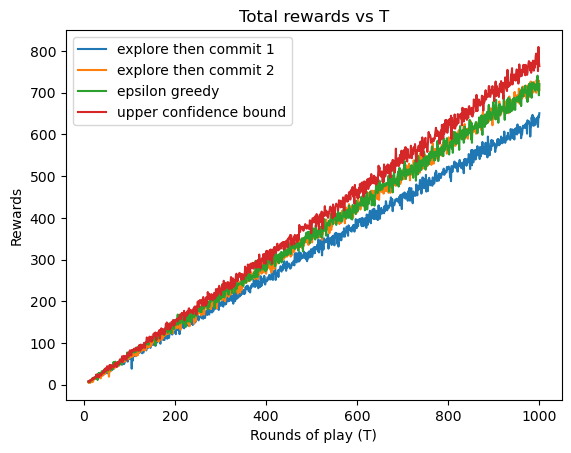

In [36]:
plt.plot(T1,rewards1,label = 'explore then commit 1')
plt.plot(T2,rewards2,label = 'explore then commit 2')
plt.plot(T3,rewards3,label = 'epsilon greedy')
plt.plot(T4,rewards4,label = 'upper confidence bound')

plt.ylabel("Rewards")
plt.xlabel("Rounds of play (T)")
plt.title("Total rewards vs T")

plt.legend()
plt.show()

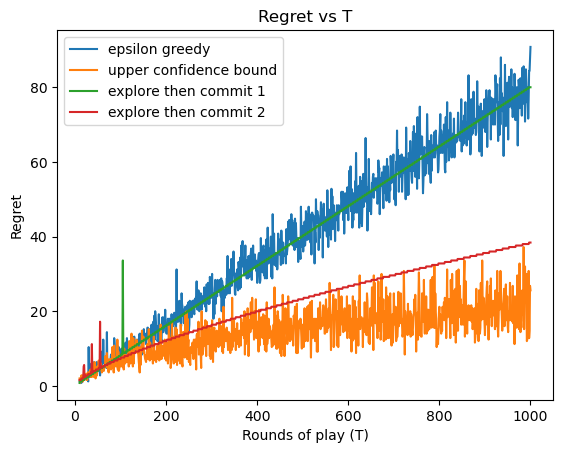

In [37]:
plt.plot(T3,regret3,label = 'epsilon greedy')
plt.plot(T4,regret4,label = 'upper confidence bound')
plt.plot(T1,regret1,label = 'explore then commit 1')
plt.plot(T2,regret2,label = 'explore then commit 2')

plt.ylabel("Regret")
plt.xlabel("Rounds of play (T)")
plt.title("Regret vs T")

plt.legend()
plt.show()